In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as graph

graph.style.use('fivethirtyeight')

Statistical power is the probability of detecting a true effect if a true effect exists.

Since a difference is said to be signifiacnt if the chances of observing a difference as large or greater is less than 5% under the null distribution, we can determine power by the area of the alternate distribution that is above the 5% threshold

Suppose you want to determine if a coin is fair, the null distribution is the number of heads observed when a fair coin is flipped (p=0.5)
The alternate distribution is the number of heads observed when an unfair coin is flipped with the suspected effect (lets say p=0.55)

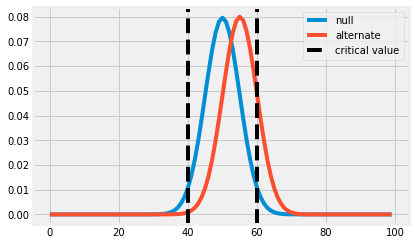

Alternate distribution area above critical value = 0.13607421925534297


In [2]:
def sig_area(n, p, lower_cv, upper_cv):
    return stats.binom.sf(n=n, p=p, k=upper_cv) + stats.binom.cdf(n=n, p=p, k=lower_cv)

# Make null and alternate distributions
n, null_p, alt_p = 100, 0.5, 0.55
null = stats.binom(n=n, p=null_p)
alt = stats.binom(n=n, p=alt_p)

fair_data = np.array([null.pmf(k=i) for i in range(n)])
unfair_data = np.array([alt.pmf(k=i) for i in range(n)])

# Find when the cumulative probability density is more than 0.975 or less than 0.025
upper_cv = null.ppf(q=0.975)
lower_cv = null.ppf(q=0.025)

graph.plot(fair_data, label='null')
graph.plot(unfair_data, label='alternate')
graph.axvline(upper_cv, label='critical value', color='black', ls='dashed')
graph.axvline(lower_cv, color='black', ls='dashed')
graph.legend()
graph.show()

print('Alternate distribution area above critical value = {}'.format(sig_area(n, alt_p, lower_cv, upper_cv)))

We can see what the area above the critical value is for different 'effect sizes', in this case different unfairness of a coin 

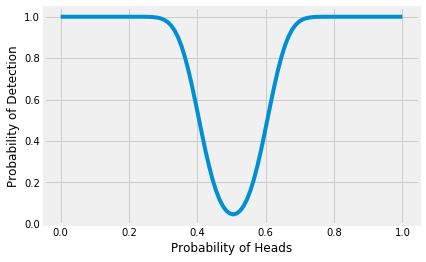

In [3]:
p_heads = np.linspace(0, 1, 100)

x = [sig_area(n, pval, lower_cv, upper_cv) for pval in p_heads]

graph.plot(p_heads, x)
graph.ylabel('Probability of Detection')
graph.xlabel('Probability of Heads')
graph.show()

What happens if we change the sample size?

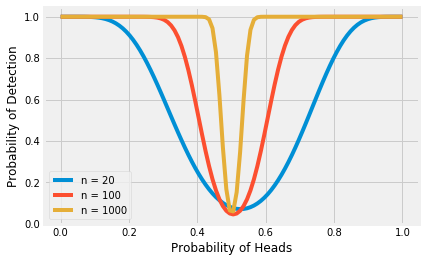

In [4]:
n, null_p, alt_p = [20, 100, 1000], 0.5, 0.55

for n_i in n:
    null = stats.binom(n=n_i, p=null_p)

    # Find when the cumulative probability density is more than 0.975 or less than 0.025
    upper_cv = null.ppf(q=0.975)
    lower_cv = null.ppf(q=0.025)

    x = [sig_area(n_i, pval, lower_cv, upper_cv) for pval in p_heads]

    graph.plot(p_heads, x, label='n = {}'.format(n_i))
    graph.ylabel('Probability of Detection')
    graph.xlabel('Probability of Heads')

graph.legend()
graph.show()